In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split

from keras.layers import Dense
from keras.models import Sequential

In [11]:
df = pd.read_csv('ccpp.csv')

#Inputs and Output
X = scale(np.array(df.drop(['PE'],1)))
y = df['PE']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20,random_state = 42)

In [3]:
clf = LinearRegression()

#Compute cross_validation
cv_score = cross_val_score(clf,X,y,cv=5)
print('CV Score: {}'.format((cv_score)))
print('Average 5_fold CV Score: {}'.format(np.mean(cv_score)))

clf.fit(X_train,y_train)
y_pred =clf.predict(X_test)
score = clf.score(X_test,y_test)
coeff = clf.coef_
inter = clf.intercept_

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE: {}'.format(rmse))
#print('Coefficients' + coeff)

CV Score: [0.92994188 0.91956987 0.93114222 0.92812498 0.93352748]
Average 5_fold CV Score: 0.9284612870118183
RMSE: 4.428101774539945


In [4]:
#Initializing Neural
model = Sequential()

model.add(Dense(4, input_dim=4, activation='relu'))

model.add(Dense(3, activation='relu'))
#model.add(Dense(2, activation='relu'))

model.add(Dense(1, activation='relu'))

model.compile(loss='mean_squared_error', optimizer = 'adam',metrics=['accuracy'])

history = model.fit(X_train,y_train,nb_epoch= 10, verbose=1,batch_size=10)

[test_loss, test_acc] = model.evaluate(X_test, y_test, batch_size=10) 

print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

c:\users\harpreet singh\appdata\local\programs\python\python36-64\lib\site-packages\keras\models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
7654/7654 [==============================] - 3s 404us/step - loss: 200251.7413 - acc: 0.0000e+00
Epoch 2/10
7654/7654 [==============================] - 2s 201us/step - loss: 159947.2532 - acc: 0.0000e+00
Epoch 3/10
7654/7654 [==============================] - 2s 201us/step - loss: 110357.2484 - acc: 0.0000e+00
Epoch 4/10
7654/7654 [==============================] - 2s 203us/step - loss: 92802.4209 - acc: 1.3065e-04
Epoch 5/10
7654/7654 [==============================] - 2s 198us/step - loss: 78199.6285 - acc: 0.0000e+00
Epoch 6/10
7654/7654 [==============================] - 2s 197us/step - loss: 41593.1219 - acc: 0.0000e+00
Epoch 7/10
7654/7654 [==============================] - 2s 198us/step - loss: 6298.8285 - acc: 0.0000e+00
Epoch 8/10
7654/7654 [==============================] - 2s 199us/step - loss: 551.5996 - acc: 0.0000e+00
Epoch 9/10
7654/7654 [==============================] - 2s 200us/step - loss: 222.5028 - acc: 3.9195e-04
Epoch 10/10
1914/1914 [================

In [12]:
#For GP Regression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, ConstantKernel, WhiteKernel, RationalQuadratic, ExpSineSquared
from pandas.plotting import scatter_matrix
import GPy

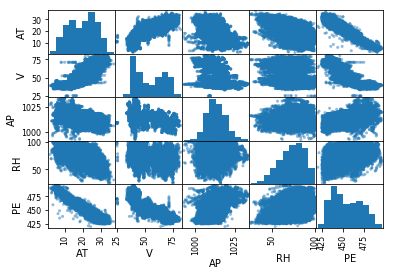

In [13]:
df.head()
scatter_matrix(df)
plt.show()

#AT as the only input
X1 = scale(np.array(df.drop(['PE','V','AP','RH'],1)))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size = .20,random_state = 42)
clf = LinearRegression()

#Compute cross_validation
cv_score = cross_val_score(clf,X1,y,cv=5)
print('CV Score: {}'.format((cv_score)))
print('Average 5_fold CV Score: {}'.format(np.mean(cv_score)))

clf.fit(X_train,y_train)
y_pred =clf.predict(X_test)
score = clf.score(X_test,y_test)
coeff = clf.coef_
inter = clf.intercept_

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE: {}'.format(rmse))

CV Score: [0.90483733 0.89113994 0.89557495 0.89756698 0.90446157]
Average 5_fold CV Score: 0.8987161552172063
RMSE: 5.332428308816945


In [ ]:
#length_scale=10,length_scale_bounds=(1e-2,1e2)

#Kernel = ConstantKernel(10,(1e-2,1e2))*RBF(10,(1e-2,1e2))

#clf1 = GaussianProcessRegressor(kernel=Kernel,n_restarts_optimizer=3)
#clf1.fit(X_train,y_train)
#y_pred, sigma = clf1.predict(X_test,return_std=True)

In [18]:
theta = np.array([0.5,0.25,0.1]) # GP4

In [17]:

def kernel2(data1,data2,theta,wantderiv=True,measnoise=1.):
	# Uses exp(theta) to ensure positive hyperparams
	theta = np.squeeze(theta)
	theta = np.exp(theta)
	# Squared exponential
	if np.ndim(data1) == 1:
		d1 = np.shape(data1)[0]
		n = 1
		data1 = data1*np.ones((d1,1))
		data2 = data2*np.ones((np.shape(data2)[0],1))
	else:
		(d1,n) = np.shape(data1)

	d2 = np.shape(data2)[0]
	sumxy = np.zeros((d1,d2))
	for d in range(n):
		D1 = np.transpose([data1[:,d]]) * np.ones((d1,d2))
		D2 = [data2[:,d]] * np.ones((d1,d2))
		sumxy += (D1-D2)**2*theta[d+1]

	k = theta[0] * np.exp(-0.5*sumxy) 
	#k = theta[0]**2 * np.exp(-sumxy/(2.0*theta[1]**2)) 

	#print k
	#print measnoise*theta[2]**2*np.eye(d1,d2)
	if wantderiv:
		K = np.zeros((d1,d2,len(theta)+1))
		K[:,:,0] = k + measnoise*theta[2]*np.eye(d1,d2)
		K[:,:,1] = k 
		K[:,:,2] = -0.5*k*sumxy
		K[:,:,3] = theta[2]*np.eye(d1,d2)
		return K
	else:	
		return k + measnoise*theta[2]*np.eye(d1,d2)
    

[[2.75389219 1.63500738 1.61230263 ... 0.89943384 1.60694338 0.02722941]
 [1.63500738 2.75389219 1.64317257 ... 0.77365218 1.64093253 0.01864681]
 [1.61230263 1.64317257 2.75389219 ... 0.69696987 1.64853068 0.01453357]
 ...
 [0.89943384 0.77365218 0.69696987 ... 2.75389219 0.68312142 0.34797583]
 [1.60694338 1.64093253 1.64853068 ... 0.68312142 2.75389219 0.01386781]
 [0.02722941 0.01864681 0.01453357 ... 0.34797583 0.01386781 2.75389219]]


In [21]:
k = kernel2(X_train,X_train,theta,wantderiv=False)
kstar = kernel2(X_train,X_test,theta,wantderiv=False)
kstar = np.squeeze(kstar)
kstarstar = kernel2(X_test,X_test,theta,wantderiv=False)
kstarstar = np.squeeze(kstarstar)

In [23]:
L = np.linalg.cholesky(k)
beta = np.linalg.solve(L.transpose(), np.linalg.solve(L,y_train))


In [24]:
#predict
f = np.dot(kstar.transpose(), beta)
v = np.linalg.solve(L,kstar)
V = kstarstar-np.dot(v.transpose(),v) 

In [26]:
#log posterior
logp = -1*(-0.5*np.dot(y_train.transpose(),beta) - np.sum(np.log(np.diag(L))) - np.shape(X_train)[0] /2. * np.log(2*np.pi))

In [30]:
#y_train.reshape(7654,1)
#Xtest.shape = (len(Xtest),1)

invL = np.linalg.inv(L)
invk = np.dot(invL.T,invL)
    
#mean = np.dot(kstar,np.dot(invk,y_train))
#var = kstarstar - np.diag(np.dot(kstar,np.dot(invk,kstar.T)))
#var = np.reshape(var,(100,1))